# Project 1: Credit Card Transaction Analysis

Dataset: from Kaggle

https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset


In [1]:
"""
Import Dependencies
"""
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import itertools

from ipywidgets import interact, widgets
from dateutil.relativedelta import relativedelta

In [2]:
"""
Dataset:
Read Credit Card Transaction Dataset
"""
credit_card_transaction_data =  pd.read_csv("../data/credit_card_transactions.csv")


In [ ]:
"""
Dataset:
Explore DataSet
"""
print("----------------------------------------------------------")
print(f"Information on field attributes")
print("----------------------------------------------------------")
display(credit_card_transaction_data.info())
print(f"\n\n")
print("----------------------------------------------------------")
print(f"Display first 5 records")
display(credit_card_transaction_data.head(5))
print("----------------------------------------------------------")
print(f"\n\n")
print(f"Display count populated")
display(credit_card_transaction_data.count())
print("----------------------------------------------------------")
print(f"\n\n")
print(f"Display Shape of Data")
display(credit_card_transaction_data.shape)
print("----------------------------------------------------------")
print(f"\n\n")
print(f"Display Count by Category")
display(credit_card_transaction_data.category.value_counts())
print(f"\n\n")
print("----------------------------------------------------------")
print(f"Display Count of Fraud vs. Legitimate transactions")
display(credit_card_transaction_data.is_fraud.value_counts())
print("----------------------------------------------------------")
print(f"Statistics of dataset")
display(credit_card_transaction_data.describe())
print("----------------------------------------------------------")


In [3]:
"""
Copy of data frame
"""
df = credit_card_transaction_data.copy()


In [4]:
"""
Data Cleanup section:
1. Attribute "Unnamed: 0" can be removed
2, Attribute: trans_date_trans_time is a string and should be converted to datetime
3. Attribute: unix_time is not needed and can be removed
Attribute: dob (Date of Birth) is a string and should be converted to datetime
"""

del credit_card_transaction_data['Unnamed: 0']
#cleanup 1
print("----------------------------------------------------------")
print("Unnamed: 0 removed")
print(f"\n\n")
#cleanup 2
credit_card_transaction_data['trans_date_time'] = pd.to_datetime(credit_card_transaction_data['trans_date_trans_time'])
del credit_card_transaction_data['trans_date_trans_time']
print("----------------------------------------------------------")
print("trans_date_trans_time converted to datetime and relabeled trans_date_time")
print(f"\n\n")
#cleanup 3
del credit_card_transaction_data['unix_time']
print("----------------------------------------------------------")
print("unix_time removed")
print(f"\n\n")
#cleanup 4
credit_card_transaction_data['dob'] = pd.to_datetime(credit_card_transaction_data['dob'])
print("----------------------------------------------------------")
print("dob converted to datetime")
print(f"Youngest date of birth {credit_card_transaction_data['dob'].max()}")
print(f"Oldest date of birth {credit_card_transaction_data['dob'].min()}")
print(f"\n\n")

print("----------------------------------------------------------")

----------------------------------------------------------
Unnamed: 0 removed



----------------------------------------------------------
trans_date_trans_time converted to datetime and relabeled trans_date_time



----------------------------------------------------------
unix_time removed



----------------------------------------------------------
dob converted to datetime
Youngest date of birth 2005-01-29 00:00:00
Oldest date of birth 1924-10-30 00:00:00



----------------------------------------------------------


In [5]:
"""
Create additional attributes
1. age - based on date of birth
2. age_group bin based on generational view
link:
"""
# point 1
credit_card_transaction_data['today'] = pd.to_datetime("today")
credit_card_transaction_data['age'] = round((credit_card_transaction_data['today'] - \
                                             credit_card_transaction_data['dob'])/np.timedelta64(1,'Y'),0).astype('int')
del credit_card_transaction_data['today']
print("----------------------------------------------------------")
print("included calculated attribute age")
print(f"\n\n")

#point 2
group_names = ["Gen Z","Millennial","Gen X","Boomer","Elderly"]
bins = [12, 28, 44, 60, 79, 102]
credit_card_transaction_data["age_group"] = \
    pd.cut(credit_card_transaction_data["age"],bins,labels=group_names,include_lowest=True)
credit_card_transaction_data.head(5)
print("----------------------------------------------------------")
print("included binned attribute age_group")
print(f"\n\n")
print("----------------------------------------------------------")
print("check dataframe to review age_group")
print(f"\n\n")
display(credit_card_transaction_data.head(5))

----------------------------------------------------------
included calculated attribute age



----------------------------------------------------------
included binned attribute age_group



----------------------------------------------------------
check dataframe to review age_group





,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date_time,age,age_group
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,28705.0,2019-01-01 00:00:18,36,Millennial
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,NaN,2019-01-01 00:00:44,46,Gen X
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,83236.0,2019-01-01 00:00:51,63,Boomer
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,NaN,2019-01-01 00:01:16,58,Gen X
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,22844.0,2019-01-01 00:03:06,38,Millennial


In [6]:
"""
Some more exploration
"""
Fraud_Cnt_Percent = ( len(credit_card_transaction_data.loc[credit_card_transaction_data['is_fraud'] == 1]) / len(credit_card_transaction_data) ) * 100
print(f"Detected fraudulent Transaction Count Pct: {round(Fraud_Cnt_Percent,2)}%")

Fraud_Dollars_Percent = ( credit_card_transaction_data.loc[(credit_card_transaction_data['is_fraud'] == 1),'amt'].sum() / credit_card_transaction_data['amt'].sum() ) * 100
print(f"Detected fraudulent Dollar Amount Pct : {round(Fraud_Dollars_Percent,2)}%")

Detected fraudulent Transaction Count Pct: 0.58%
Detected fraudulent Dollar Amount Pct : 4.37%


In [7]:
"""
Data Prep for Chart 1: Visualization of Fraudulent transactions vs. All transactions By Age Group
"""

#Dataframe for fradulent transactions
fraud_transaction_data = credit_card_transaction_data.loc[credit_card_transaction_data['is_fraud'] == 1]

#Dataframe: Grouped by age group (fraud)
fraud_trans_by_age = fraud_transaction_data.groupby("age_group")["amt"].agg(['sum','count'])
fraud_trans_by_age.reset_index()
fraud_trans_by_age.columns = ['Fraud Amt ( $ )','Fraud Cnt']

#Dataframe: Grouped by age group (All)
all_trans_by_age = credit_card_transaction_data.groupby("age_group")["amt"].agg(['sum','count'])
all_trans_by_age.reset_index()
all_trans_by_age.columns = ['Total Amt ( $ )','Total Cnt']

# Merge the two data frames
transaction_summary_by_age = pd.merge(all_trans_by_age, fraud_trans_by_age, on="age_group")
print("----------------------------------------------------------")
print("Dataframe: transaction_summary_by_age")
print(f"\n\n")
display(transaction_summary_by_age)



----------------------------------------------------------
Dataframe: transaction_summary_by_age





,Total Amt ( $ ),Total Cnt,Fraud Amt ( $ ),Fraud Cnt
age_group,,,,
Gen Z,5882953.58,95840,350081.61,598
Millennial,32283064.80,435405,1051802.69,2101
Gen X,29802580.62,416058,1101723.74,2177
Boomer,16845398.79,254652,1015737.59,1776
Elderly,6408431.11,94720,468742.98,854


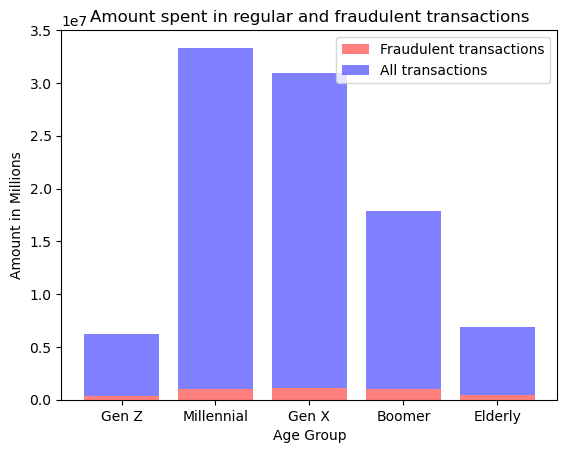

In [8]:
"""
Chart 1: Visualization of Fraudulent transactions vs. All transactions By Age Group
"""

plt.bar(transaction_summary_by_age.index, transaction_summary_by_age['Fraud Amt ( $ )'], color='r', alpha = 0.5, label="Fraudulent transactions")
plt.bar(transaction_summary_by_age.index, transaction_summary_by_age['Total Amt ( $ )'], bottom = transaction_summary_by_age['Fraud Amt ( $ )'], color='b', alpha = 0.5, label = "All transactions")
plt.title("Amount spent in regular and fraudulent transactions")
plt.legend()
plt.ylabel('Amount in Millions')
plt.xlabel('Age Group')
plt.show()

In [9]:
"""
Data Prep 1: Chart 2: Visualization of Fraudulent transactions vs. All transactions By Category
"""

#function to refine the category names
def refine(cat):
    match cat:
        case "shopping_pos":
            return "Shopping POS"
        case "shopping_net":
            return "Shopping NET"
        case "gas_transport":
            return "Gas & Transport"
        case "grocery_pos":
            return "Grocery POS"
        case "home":
            return "Home"
        case "kids_pets":
            return "Kids & Pets"
        case "entertainment":
            return "Entertainment"
        case "food_dining":
            return "Food & Dining"
        case "personal_care":
            return "Personal Care"
        case "health_fitness":
            return "Health & Fitness"
        case "grocery_net":
            return "Grocery NET"
        case "travel":
            return "Travel"
        
#Create additional attribute 'category_refined' - add misc. to shopping. Also relable categories to more English names
credit_card_transaction_data['category_refined'] = credit_card_transaction_data['category']
credit_card_transaction_data['category_refined'].value_counts()
credit_card_transaction_data['category_refined'] = credit_card_transaction_data['category_refined'].apply(lambda x: "shopping_pos" if (x == "misc_pos") else x)
credit_card_transaction_data['category_refined'] = credit_card_transaction_data['category_refined'].apply(lambda x: "shopping_net" if (x == "misc_net") else x)
credit_card_transaction_data['category_refined'].value_counts()

#use defined function refine
credit_card_transaction_data['category_refined'] = credit_card_transaction_data['category_refined'].apply(refine)

print("----------------------------------------------------------")
print("Dataframe: credit_card_transaction_data")
print(f"\n\n")
display(credit_card_transaction_data.head(5))
print("----------------------------------------------------------")
print("Dataframe: value counts by category_refined")
print(f"\n\n")
display(credit_card_transaction_data['category_refined'].value_counts())

----------------------------------------------------------
Dataframe: credit_card_transaction_data





,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date_time,age,age_group,category_refined
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,28705.0,2019-01-01 00:00:18,36,Millennial,Shopping NET
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,NaN,2019-01-01 00:00:44,46,Gen X,Grocery POS
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,83236.0,2019-01-01 00:00:51,63,Boomer,Entertainment
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,NaN,2019-01-01 00:01:16,58,Gen X,Gas & Transport
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,22844.0,2019-01-01 00:03:06,38,Millennial,Shopping POS


----------------------------------------------------------
Dataframe: value counts by category_refined





Shopping POS        196327
Shopping NET        160830
Gas & Transport     131659
Grocery POS         123638
Home                123115
Kids & Pets         113035
Entertainment        94014
Food & Dining        91461
Personal Care        90758
Health & Fitness     85879
Grocery NET          45452
Travel               40507
Name: category_refined, dtype: int64

In [10]:
"""
Data Prep 2: Chart 2: Visualization of Fraudulent transactions vs. All transactions By Category
"""

#Data frame for all transactions
transaction_by_category = credit_card_transaction_data.groupby('category_refined')['amt'].sum().sort_values()
transaction_by_category = transaction_by_category.reset_index()
transaction_by_category.columns = ['Category','Total Amount']
transaction_by_category

#Data frame for fraulent transactions 
#redo fraud dataframe to pick up category_refined
fraud_transaction_data2 = credit_card_transaction_data.loc[credit_card_transaction_data['is_fraud'] == 1]
fraud_by_category = fraud_transaction_data2.groupby('category_refined')['amt'].sum().sort_values()
fraud_by_category = fraud_by_category.reset_index()
fraud_by_category.columns = ['Category','Fraud Amount']
fraud_by_category

#Merge the two data frames
transaction_summary_by_category = pd.merge(transaction_by_category,fraud_by_category,on="Category",how="left")
transaction_summary_by_category = transaction_summary_by_category.set_index('Category')

print("----------------------------------------------------------")
print("Dataframe: Transaction Summary by Category")
print(f"\n\n")
display(transaction_summary_by_category)

----------------------------------------------------------
Dataframe: Transaction Summary by Category





,Total Amount,Fraud Amount
Category,,
Grocery NET,2439412.68,1629.82
Personal Care,4353450.53,5757.52
Travel,4516721.68,1051.49
Health & Fitness,4653108.02,2693.04
Food & Dining,4672459.44,18131.62
Entertainment,6036678.56,117323.79
Kids & Pets,6503680.16,4331.08
Home,7173928.11,50971.66
Gas & Transport,8351732.29,7594.11


<Figure size 2000x800 with 0 Axes>

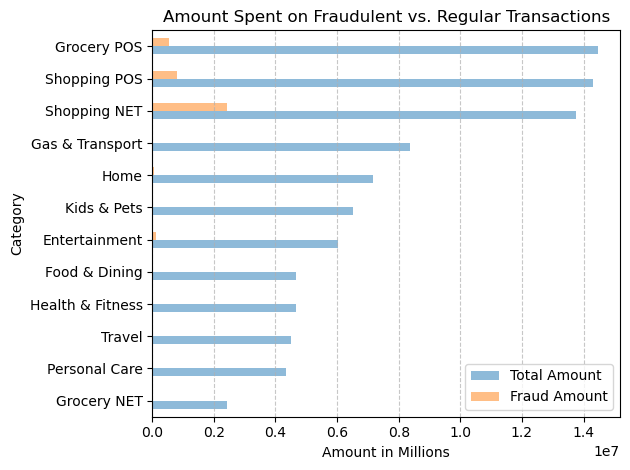

In [11]:
"""
Chart 2: Visualization of Fraudulent transactions vs. All transactions By Category
"""

plt.figure(figsize=(20, 8))
transaction_summary_by_category[['Total Amount','Fraud Amount']].plot(kind='barh', alpha = 0.5)
plt.yticks(ticks=None,label=transaction_summary_by_category.index)
plt.title('Amount Spent on Fraudulent vs. Regular Transactions')
plt.xlabel('Amount in Millions')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
"""
Data Prep 1: Chart 3: Visualization of Amount Spent (Males vs. Females) By Category
"""
transaction_by_category_gender = credit_card_transaction_data.groupby(['category_refined','gender'])['amt'].sum()
transaction_by_category_gender = transaction_by_category_gender.reset_index()
transaction_by_category_gender.columns = ['Category','Gender','Total Amount (Dollars)']
print("----------------------------------------------------------")
print("Dataframe: Transaction By Category and Gender")
print(f"\n\n")
display(transaction_by_category_gender)

----------------------------------------------------------
Dataframe: Transaction By Category and Gender





,Category,Gender,Total Amount (Dollars)
0,Entertainment,F,3234727.18
1,Entertainment,M,2801951.38
2,Food & Dining,F,2440768.60
3,Food & Dining,M,2231690.84
4,Gas & Transport,F,4509506.39
5,Gas & Transport,M,3842225.90
6,Grocery NET,F,1411112.98
7,Grocery NET,M,1028299.70
8,Grocery POS,F,8934836.28
9,Grocery POS,M,5525986.10


In [13]:
"""
Data Prep 2: Chart 3: Visualization of Amount Spent (Males vs. Females) By Category
"""

#Dataframe for transaction data by category and gender - Males
trans_set_males = transaction_by_category_gender.loc[transaction_by_category_gender['Gender'] == "M"]

#Dataframe for transaction data by category and gender - Females
trans_set_females = transaction_by_category_gender.loc[transaction_by_category_gender['Gender'] == "F"]

#Merge the two dataframes
trans_summary = pd.merge(trans_set_males,trans_set_females,on="Category",how="outer")
trans_summary = trans_summary.set_index('Category')
trans_summary.columns = ['x','Amount (Males)','y','Amount (Females)']
del trans_summary['x']
del trans_summary['y']
print("----------------------------------------------------------")
print("Dataframe: Transaction By Category and Gender - Side by Side")
print(f"\n\n")
display(trans_summary)

----------------------------------------------------------
Dataframe: Transaction By Category and Gender - Side by Side





,Amount (Males),Amount (Females)
Category,,
Entertainment,2801951.38,3234727.18
Food & Dining,2231690.84,2440768.60
Gas & Transport,3842225.90,4509506.39
Grocery NET,1028299.70,1411112.98
Grocery POS,5525986.10,8934836.28
Health & Fitness,2328244.83,2324863.19
Home,3581968.13,3591959.98
Kids & Pets,2907560.33,3596119.83
Personal Care,1689742.63,2663707.90


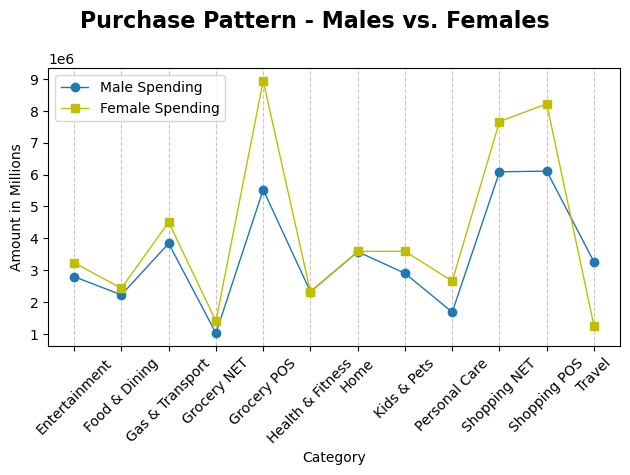

In [14]:
"""
Chart 3: Visualization of Amount Spent (Males vs. Females) By Category
"""

fig, ax1 = plt.subplots(1, sharex=True)
fig.suptitle("Purchase Pattern - Males vs. Females", fontsize=16, fontweight="bold")
ax1.plot(trans_summary.index, trans_summary['Amount (Males)'], linewidth=1, marker="o", label = "Male Spending")
ax1.set_ylabel("Amount in Millions")
ax1.set_xlabel("Category")
ax1.plot(trans_summary.index, trans_summary['Amount (Females)'], linewidth=1, marker="s", color="y", label = "Female Spending")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(ticks=None,label=trans_summary.index, rotation=45)
plt.legend()
fig.tight_layout()
plt.show()

In [15]:
"""
Chart Prep 3: Present summary stats for chart
Visualization of Amount Spent (Males vs. Females) By Category
"""
def highlight_last(x):
    '''
    highlight the last row in a Series BOLD.
    '''
    return ['font-weight: bold' if v == x.iloc[-1] else '' for v in x]

trans_summary_in_M = trans_summary
trans_summary_in_M['Amount (Males)'] = trans_summary_in_M['Amount (Males)'].div(1000000).round(2)
trans_summary_in_M['Amount (Females)'] = trans_summary_in_M['Amount (Females)'].div(1000000).round(2)
trans_summary_in_M.loc['TOTAL'] = trans_summary_in_M.sum()
trans_summary_in_M['Male Spend - Female Spend']= trans_summary_in_M['Amount (Males)'] - \
    trans_summary_in_M['Amount (Females)']


print("----------------------------------------------------------")
print("Dataframe: Transaction By Category and Gender - Presentation purposes")
print(f"\n\n")
display(trans_summary_in_M)

----------------------------------------------------------
Dataframe: Transaction By Category and Gender - Presentation purposes





,Amount (Males),Amount (Females),Male Spend - Female Spend
Category,,,
Entertainment,2.80,3.23,-0.43
Food & Dining,2.23,2.44,-0.21
Gas & Transport,3.84,4.51,-0.67
Grocery NET,1.03,1.41,-0.38
Grocery POS,5.53,8.93,-3.40
Health & Fitness,2.33,2.32,0.01
Home,3.58,3.59,-0.01
Kids & Pets,2.91,3.60,-0.69
Personal Care,1.69,2.66,-0.97


In [16]:
"""
Data Prep: Chart 4: Monthly purchases
"""
# Prepare data by timeseries
transaction_amt_by_dtime = credit_card_transaction_data[['trans_date_time','amt']]
transaction_amt_by_dtime = transaction_amt_by_dtime.set_index(['trans_date_time'])

# prepare dataframe for monthly purchase view
purchases_per_month = transaction_amt_by_dtime["amt"].groupby(by=[transaction_amt_by_dtime.index.year, transaction_amt_by_dtime.index.month]).sum()
purchases_per_month_df = pd.DataFrame(purchases_per_month) 

print("----------------------------------------------------------")
print("Dataframe: Purchases by month")
print(f"\n\n")
display(purchases_per_month_df)

----------------------------------------------------------
Dataframe: Purchases by month





amt
trans_date_time trans_date_time            
2019            1                3759750.03
                2                3604662.23
                3                5027886.40
                4                4761504.58
                5                5060903.32
                6                6036397.42
                7                6044026.74
                8                6047288.65
                9                4949834.42
                10               4851267.37
                11               4923252.59
                12               9918179.18
2020            1                3663064.49
                2                3369944.05
                3                5162116.08
                4                4691329.78
                5                5244036.82
                6                4106984.75

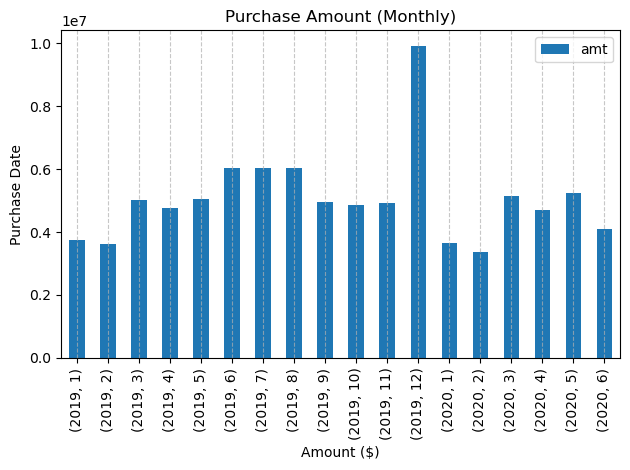

In [17]:
"""
Chart 4: Monthly purchases
"""

purchases_per_month_df.plot(kind='bar')
plt.title('Purchase Amount (Monthly)')
plt.xlabel('Amount ($)')
plt.ylabel('Purchase Date')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



In [18]:
"""
Chart 5: Generate the correlation matrix and find the strongest positive and negative correlations
"""

#Not enough memnory to generate heat map; so highlight significant correlations
def highlight_cells(val):
    color = 'cyan' if val > 0.2  else ''
    return 'background-color: {}'.format(color)

# Generate correlation matrix
credit_card_transaction_corr = credit_card_transaction_data.corr()

print("----------------------------------------------------------")
print("Correlation Matrix")
print(f"\n\n")


display(credit_card_transaction_corr.style.applymap(highlight_cells))

----------------------------------------------------------
Correlation Matrix





,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,merch_zipcode,age
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,-0.058942,-0.048252,-0.000981,0.056402,-0.000686
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,0.219404,0.002074,-0.009756
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,-0.113561,-0.908924,-0.002162,0.980963,0.011271
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.001894,-0.160403,0.046594
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.015452,0.999120,0.001721,-0.919444,-0.030240
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,0.002136,0.085204,-0.091420
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.001741,-0.161581,0.046214
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.015431,1.000000,0.001721,-0.920664,-0.030162
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,0.001741,0.001721,1.000000,-0.002992,0.012352
merch_zipcode,0.056402,0.002074,0.980963,-0.160403,-0.919444,0.085204,-0.161581,-0.920664,-0.002992,1.000000,0.006810


In [19]:
"""
Data Prep: Chart 6: Fraudulent trans. count by merchant
"""
def format_str(x, y):
    return (f"{x} of {y} merchants have been targeted for fraud")


fraud_count_by_merchant = credit_card_transaction_data.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)
fraud_count_by_merchant = fraud_count_by_merchant.reset_index()
fraud_count_by_merchant = fraud_count_by_merchant.set_index('merchant')
fraud_hit = len(fraud_count_by_merchant[fraud_count_by_merchant['is_fraud'] > 0])
count_all = len(fraud_count_by_merchant)
label1 = format_str(fraud_hit,count_all)


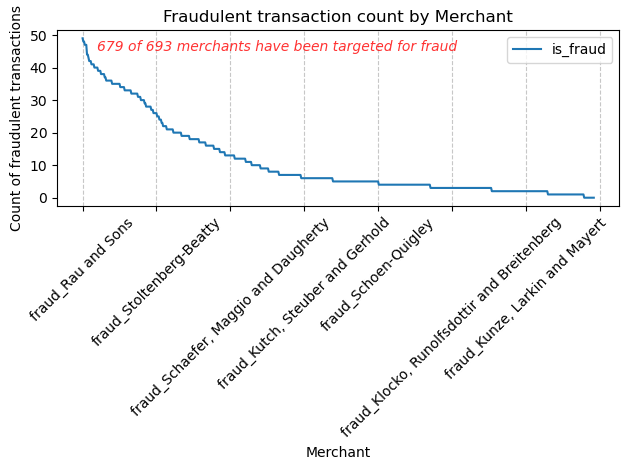

In [20]:
"""
Chart 6: Fraudulent trans. count by merchant
"""

fraud_count_by_merchant.plot(kind='line')
plt.text(20,45,label1, style = 'italic',color='r', alpha=0.8)
plt.title('Fraudulent transaction count by Merchant')
plt.xlabel('Merchant')
plt.xticks(ticks=None,label=fraud_count_by_merchant.index,rotation=45)
plt.ylabel('Count of fraudulent transactions')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
""" 
Chart 7
"""
#fraud non fraud distribution

palette = sns.color_palette('Accent', 8)


def plot_chart(col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))


    counts = df['is_fraud'].value_counts()
    wedges, texts, autotexts = ax[0].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 18, 'fontfamily': 'serif'},
        shadow=False,
        wedgeprops={'edgecolor': 'black', 'lw': 1.5},
        colors=palette
    )
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
        autotext.set_size(14)
    
    ax[0].set_title( 'Pie Chart', fontweight='bold', fontfamily='serif')          


    sns.countplot(x=col, data=df, ax=ax[1], palette=palette, edgecolor='black', lw=1.5, order=counts.index)
    ax[1].set_title( 'Count Plot', fontweight='bold', fontfamily='serif')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontfamily='serif', fontsize=12,rotation=45)
    

    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
plot_chart(df['is_fraud'])

In [21]:
#Create Variables and change datatypes
# change Date column to datetime data type
# Also, we can add month and day to see some trends.
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['Month']=df['trans_date_trans_time'].dt.month 
df['Day']=df['trans_date_trans_time'].dt.day_name()
df['dob']=pd.to_datetime(df['dob'], errors='coerce')

In [22]:
#Create time variable
df['Time'] = pd.to_datetime(df['trans_date_trans_time']).dt.time

In [23]:
#Format time variable
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [24]:
#Create hour column
df['Hour'] = df['Time'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [25]:
#create time of the day groups
def timeofday(hour):
    if 5 <= hour < 12:
        return '05:00 to 11:00 hours'
    elif 12 <= hour < 17:
        return '12:00 to 16:00 hours'
    elif 17 <= hour < 21:
        return '17:00 to 20:00 hours'
    else:
        return '21:00 to 04:00 hours'

In [26]:
df['TimeoftheDay'] = df['Hour'].apply(timeofday)

In [27]:
df['dob'] = pd.to_datetime(df['dob'])

# Function to calculate age
def calculate_age(dob):
    today = datetime.now().date()
    return relativedelta(today, dob).years

# Apply the function to the DOB column
df['Age'] = df['dob'].apply(lambda x: calculate_age(x))

In [28]:
# Time of the day and Fraud and Non Fraud
def fraud(fraud_cat):
    if fraud_cat == 0:
        return 0   
    else:
        return 1
    
def nonfraud(fraud_cat):
    if fraud_cat == 0:
        return 1   
    else:
        return 0
    
df['fraud'] = df['is_fraud'].apply(fraud)
df['nonfraud'] = df['is_fraud'].apply(nonfraud)

In [29]:
# Time of the day and Fraud
sns.set_palette('BuGn')

#  pivot table 
pivot_Fraudcounts = pd.pivot_table(
    df,
    values='fraud',
    index=['TimeoftheDay'],
    aggfunc=np.sum,
    margins=True,
    margins_name='Total',
    fill_value=0
)


total_frauds = pivot_Fraudcounts.loc['Total'].values[0]
pivot_percentage = (pivot_Fraudcounts / total_frauds) * 100


combined_pivot = pd.concat([pivot_Fraudcounts, pivot_percentage], axis=1, keys=['Count', 'Percentage'])


combined_pivot.drop('Total', inplace=True)

# Format the percentage column
combined_pivot[('Percentage', 'fraud')] = combined_pivot[('Percentage', 'fraud')].map("{:.2f}%".format)

# Display the combined pivot table
combined_pivot


,Count,Percentage
,fraud,fraud
TimeoftheDay,,
05:00 to 11:00 hours,334,4.45%
12:00 to 16:00 hours,388,5.17%
17:00 to 20:00 hours,302,4.02%
21:00 to 04:00 hours,6482,86.36%


In [30]:
# Time of the day and nonFraud
sns.set_palette('BuGn')


pivot_Fraudcounts = pd.pivot_table(
    df,
    values='nonfraud',
    index=['TimeoftheDay'],
    aggfunc=np.sum,
    margins=True,
    margins_name='Total',
    fill_value=0
)


total_frauds = pivot_Fraudcounts.loc['Total'].values[0]
pivot_percentage = (pivot_Fraudcounts / total_frauds) * 100


combined_pivot = pd.concat([pivot_Fraudcounts, pivot_percentage], axis=1, keys=['Count', 'Percentage'])


combined_pivot.drop('Total', inplace=True)


combined_pivot[('Percentage', 'nonfraud')] = combined_pivot[('Percentage', 'nonfraud')].map("{:.2f}%".format)

# Display the combined pivot table
combined_pivot

,Count,Percentage
,nonfraud,nonfraud
TimeoftheDay,,
05:00 to 11:00 hours,295383,22.91%
12:00 to 16:00 hours,326185,25.30%
17:00 to 20:00 hours,261805,20.31%
21:00 to 04:00 hours,405796,31.48%


In [31]:
#Display Fraud non Fraud amount
df['FraudAmount'] = df['amt'].where(df['is_fraud'] == 1, 0)
df['NonFraudAmount'] = df['amt'].where(df['is_fraud'] == 0, 0)

In [32]:
df_grouped_sum = df.groupby('TimeoftheDay')[['FraudAmount', 'NonFraudAmount']].sum().reset_index()

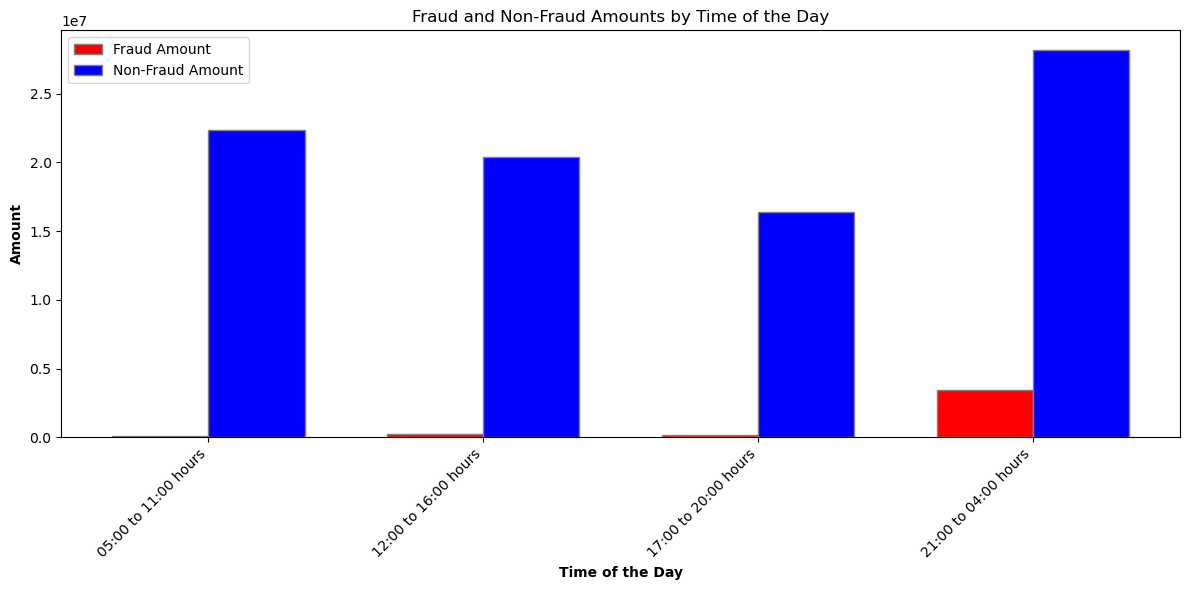

In [33]:
""" 
Chart 8
"""
# Set the width of the bars
bar_width = 0.35


r1 = np.arange(len(df_grouped_sum['TimeoftheDay']))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))
plt.bar(r1, df_grouped_sum['FraudAmount'], color='red', width=bar_width, edgecolor='grey', label='Fraud Amount')
plt.bar(r2, df_grouped_sum['NonFraudAmount'], color='blue', width=bar_width, edgecolor='grey', label='Non-Fraud Amount')


plt.xlabel('Time of the Day', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df_grouped_sum['TimeoftheDay']))], df_grouped_sum['TimeoftheDay'], rotation=45, ha='right')


plt.title('Fraud and Non-Fraud Amounts by Time of the Day')
plt.legend()


plt.tight_layout()
plt.show()

In [34]:
#Create Age groups
df['Age_Bins'] = pd.cut(df['Age'], bins=5)
df['Age_Bins'].value_counts(dropna=False)

(35.0, 51.0]     472876
(51.0, 67.0]     320550
(18.92, 35.0]    276856
(67.0, 83.0]     161009
(83.0, 99.0]      65384
Name: Age_Bins, dtype: int64

In [35]:
"""
Chart 9
"""
#Age bin by category and amount
product_lines = df['category'].unique().tolist()

sns.set_palette('Accent')
sns.set_style("darkgrid")

def plot_Age_bin(product_line):
    fig, ax = plt.subplots(figsize=(20, 6))
    df1 = df[df["category"] == product_line]
    df_pivot1 = pd.pivot_table(
        df1, 
        values="amt", 
        index="category",
        columns=["Age_Bins"],
        aggfunc=np.sum
    )
    
    pivot = df_pivot1

    pivot.plot.bar(ax=ax, stacked=False, width=0.2) 
    ax.set_ylabel("amt", fontsize=14) 
    ax.set_title(f"Amout spend for {product_line} by different Age groups", fontsize=23)  
    

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=19, rotation=0)
    

    legend = ax.legend(title='Age groups', fontsize=16, title_fontsize=18)  

    for container in ax.containers:
        labels = [f'{int(v):,}' for v in container.datavalues]  
        ax.bar_label(container, labels=labels, label_type='center', fontsize=16)
    
    plt.tight_layout()
    plt.show()


interact(
    plot_Age_bin,
    product_line=widgets.Dropdown(options=product_lines, description='Product Line:')
)

interactive(children=(Dropdown(description='Product Line:', options=('misc_net', 'grocery_pos', 'entertainment…

<function __main__.plot_Age_bin(product_line)>

In [37]:
# time series plot Fraud non Fraud amount


# Convert to datetime 
df['datetime_column'] = pd.to_datetime(df['trans_date_trans_time'])

# get date 
df['date_part'] = df['datetime_column'].dt.date

In [38]:
df_date_sum = df.groupby('date_part')[['FraudAmount', 'NonFraudAmount']].sum().reset_index()

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07')])

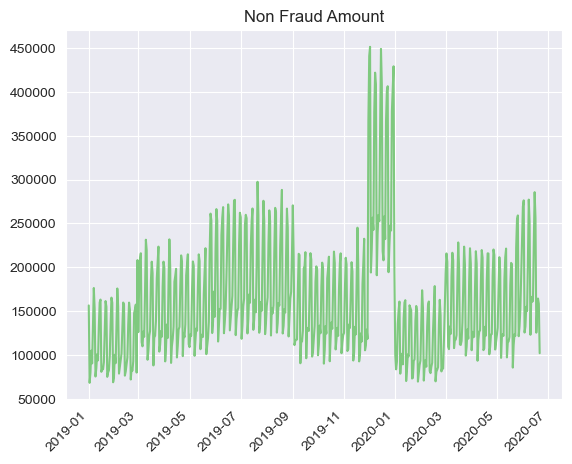

In [39]:
""" 
Charts 10 and 11
"""

plt.plot(df_date_sum['date_part'],df_date_sum['NonFraudAmount'])
plt.title("Non Fraud Amount")
plt.xticks(rotation=45, ha='right')

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07')])

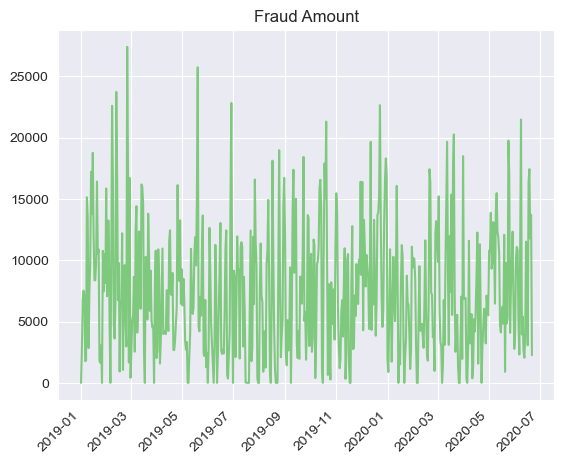

In [40]:
plt.plot(df_date_sum['date_part'],df_date_sum['FraudAmount'])
plt.title("Fraud Amount")
plt.xticks(rotation=45, ha='right')

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07')])

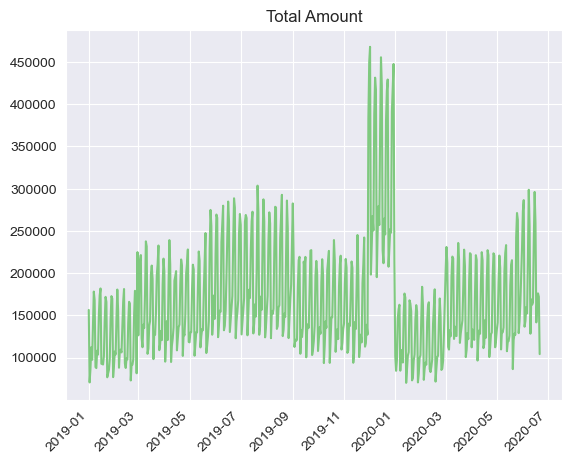

In [41]:
"""
Chart 12
"""
df_date_sum['Total Amount']=df_date_sum['FraudAmount']+ df_date_sum['NonFraudAmount']
    
plt.plot(df_date_sum['date_part'],df_date_sum['Total Amount'])
plt.title("Total Amount")
plt.xticks(rotation=45, ha='right')

In [42]:
"""
Chart 13
"""
#fraud non fraud distribution
numerical=['FraudAmount','NonFraudAmount']
def plot_distribution(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle("Distribution of Fraud/Non Fraud Amount", fontsize=16, fontweight='bold')

    counts, bins, patches = ax1.hist(df_date_sum[column].dropna(), bins=25, edgecolor='black')
    ax1.set_xlabel(column, fontsize=14)
    ax1.set_ylabel("Counts", fontsize=14)

    for count, patch in zip(counts, patches):
        height = patch.get_height()
        ax1.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    ax2.boxplot(df_date_sum[column].dropna(), vert=False)
    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel("", fontsize=14)

    median = np.median(df_date_sum[column].dropna())
    q1 = np.percentile(df_date_sum[column].dropna(), 25)
    q3 = np.percentile(df_date_sum[column].dropna(), 75)

    ax2.annotate(f'Median: {median:.2f}', xy=(median, 1), xytext=(0, -28), 
                 textcoords='offset points', ha='center', va='center', color='red', fontsize=12)
    ax2.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='blue', fontsize=12)
    ax2.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='green', fontsize=12)

    
    plt.tight_layout()
    plt.show()

interact(plot_distribution, column=widgets.Dropdown(options=numerical, description='Numeric:'))

interactive(children=(Dropdown(description='Numeric:', options=('FraudAmount', 'NonFraudAmount'), value='Fraud…

<function __main__.plot_distribution(column)>